# **ESG vs Non-ESG Investment Performance in Thailand's Petrochemicals & Chemicals Sector**

This project was completed solely for academic purposes as part of the 2603273 Python for Data Analytics course within the BBA International Program at Chulalongkorn University. It should not be considered financial or investment advice.

## **Project Proposal**

### **Team members**
*   6748001926 Kamonchanok Wiseswitayawet
*   6748018626 Khanh Khac Gia Nguyen
*   6748050626 Chinnapat Chirawikran
*   6748125026 Pornchanit Makapongumpai

### **Project Overview**
This project aims to analyze and visualize the financial performance of publicly listed companies within Thailand's Petrochemicals & Chemicals sector, comparing firms designated as ESG (Environmental, Social, and Governance) compliant against their non-ESG peers. Using Python's data analytics libraries, the project will investigate whether sustainable investing yields superior risk-adjusted returns and stronger financial fundamentals. The goal is to uncover actionable insights for investors, asset managers, and corporate strategists in the Thai market.

### **Project Goal**
To provide data-driven, analytical insights into whether ESG-designated firms in Thailand's Petrochemicals & Chemicals sector offer superior financial performance, lower risk, and better fundamental health compared to their non-ESG counterparts.

### **Data Dictionary**

| name | data type | description | example |
| :--- | :--- | :--- | :--- |
| ticker | string | The stock ticker symbol on the SET. | PTT.BK |
| company_name | string | The official name of the listed company. | PTT Public Company Limited |
| esg_status | string | Categorical representation of ESG status (ESG or Non-ESG) derived from `esg_flag`. | "ESG" |
| esg_flag | integer | A binary flag indicating ESG status (1 for ESG, 0 for Non-ESG). | 1 |
| date | datetime | The date of the stock price observation. | 2024-10-28 |
| close | float | The daily adjusted closing price of the stock. | 35.75 |
| daily_return | float | The percentage change in the adjusted close price. | 0.015 |
| annualized_return | float | The geometric average annual rate of return. | 0.125 (12.5%) |
| annualized_volatility | float | The annualized standard deviation of daily returns (risk). | 0.22 (22%) |
| sharpe_ratio | float | Risk-adjusted return (excess return per unit of volatility). | 0.55 |
| beta | float | The stock's volatility relative to the SET index. | 1.15 |
| roe | float | Return on Equity (Net Income / Shareholder's Equity). | 0.18 (18%) |
| pe_ratio | float | Price-to-Earnings ratio. | 15.4 |
| debt_to_equity | float | Debt-to-Equity (Total Liabilities / Total Shareholder's Equity). | 1.5 |


---

### **1. What business problem are you solving?**

*   **Problem:** Thai investors and financial institutions are increasingly interested in ESG investing but lack localized, data-driven evidence to confirm if these strategies lead to better financial outcomes. This uncertainty creates a barrier to confident capital allocation into sustainable assets.
*   **Business Questions:**
    *   Do ESG-compliant firms in the Petrochemicals & Chemicals sector provide higher risk-adjusted returns (Sharpe Ratio) than their peers?
    *   Do ESG firms exhibit stronger fundamentals, such as higher profitability (ROE) or lower leverage (Debt-to-Equity)?
    *   How do the valuation multiples (P/E Ratio) of ESG firms compare to non-ESG firms in the same sector?

### **2. What data do you have access to, and how reliable is it?**

*   **Dataset:**
    1.  **Stock Price Data:** Historical daily adjusted closing prices for all listed companies in the SET Petrochemicals & Chemicals sector and the SET Index (`^SET.BK`).
    2.  **ESG Classification Data:** A list of ESG-designated companies sourced from official list of Thai ESG securities list provided by the Stock Exchange of Thailand (SET).
    3.  **Fundamental Financial Data:** Key financial ratios (P/E, ROE, Debt-to-Equity) for each company.
*   **Reliability:** The stock price data will be sourced from the `yfinance` library, which is widely used and considered reliable for historical market data. The ESG classification is based on the official SET list, making it a credible source. Fundamental data from `yfinance` can sometimes be incomplete; this will be mitigated by cross-referencing with official company reports or SET disclosures if necessary.

### **3. What analytics techniques will you apply?**

*   **Data Collection & Cleaning:** Use the `yfinance` API to download price data. Clean the data by handling missing values and aligning time series for all stocks.
*   **Financial Metrics Calculation:** Programmatically compute key performance and risk indicators, including daily/annualized returns, volatility, Sharpe Ratio, and Beta.
*   **Exploratory Data Analysis (EDA):**
    *   Descriptive statistics to summarize the metrics for both ESG and non-ESG groups (mean, median, std dev).
    *   Distribution plots (box plots) to visualize differences between the two groups.
*   **Statistical Analysis:** Conduct two-sample t-tests or Mann-Whitney U tests to determine if the observed differences in performance and financial ratios between ESG and non-ESG groups are statistically significant.
*   **Interactive Visualization:** Develop interactive charts using Plotly to allow users to compare cumulative returns over time, explore risk-return trade-offs, and filter by different metrics.

### **4. Who is your target audience for the insights?**

*   **Primary:** Retail and institutional investors, portfolio managers, and financial analysts focused on the Thai market.
*   **Secondary:** Corporate finance and strategy teams within the Property Development sector, policymakers, and academic researchers.

### **5. What are the potential business impacts of your findings?**

*   Inform investment strategies by providing evidence-based guidance on the performance of ESG portfolios in Thailand.
*   Enable asset managers to build more robust, data-backed ESG investment products for their clients.
*   Help companies justify investments in sustainability initiatives by demonstrating a potential link to superior financial performance and resilience.
*   Provide market intelligence that can guide capital allocation towards more sustainable and potentially more profitable ventures.

### **Technical Requirements**

*   **Python Packages:** Pandas (data manipulation), yfinance (data collection), Matplotlib & Seaborn (static visualizations), Plotly & ipywidgets (interactive visualizations), SciPy (statistical testing).
*   **Skills:** Data cleaning, financial metrics calculation, exploratory data analysis (EDA), statistical analysis, and interactive data visualization.

### **Summary**
This capstone project will leverage descriptive and diagnostic analytics to rigorously compare the investment performance of ESG and non-ESG companies in a key Thai sector. By transforming raw financial data into clear, interactive, and statistically validated insights, the project will deliver significant value to investors and other stakeholders seeking to navigate the growing landscape of sustainable finance in Thailand.

## **Data Collection & Cleaning**

### **Importing Libraries**

Imports all the essential Python libraries that we will use for data collection, analysis, visualization, and statistical testing. Each library serves a specific and crucial role in our workflow.

In [37]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ipywidgets as widgets
import plotly.express as px

### **Loading the ESG Company List**

Loads our primary dataset—the official list of ESG-rated securities in Thailand, sourced from the file “Thai ESG_04-11-2025_cleaned.xlsx.” This dataset forms the foundation for classifying companies as either ESG or Non-ESG in our analysis. Missing values are filled with blank spaces to ensure the dataset remains clean and consistent for downstream processing.

In [38]:
# Load ESG securities list
esg_securities_list = pd.read_excel('/content/Thai ESG_04-11-2025_cleaned.xlsx')
esg_securities_list.fillna('', inplace= True)
esg_securities_list

,Symbol,Company Name,Market,Industry Group,Sector,Thai ESG Securities,SET ESG Ratings,Disclose greenhouse gas management data*,Achieve an excellent Governance Rating and disclose a Corporate Value Up plan,Corporate Value Up Plan
0,2S,2S METAL PUBLIC COMPANY LIMITED,SET,INDUS,STEEL,-,-,-,-,-
1,3BBIF,3BB INTERNET INFRASTRUCTURE FUND,SET,TECH,ICT,-,-,-,-,-
2,88TH,88(Thailand) Public Company Limited,mai,CONSUMP,,-,-,-,-,-
3,A,AREEYA PROPERTY PUBLIC COMPANY LIMITED,SET,PROPCON,PROP,-,-,-,-,-
4,A5,ASSET FIVE GROUP PUBLIC COMPANY LIMITED,SET,PROPCON,PROP,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
925,YONG,Yong Concrete Public Company Limited,mai,PROPCON,,-,-,-,-,-
926,YUASA,YUASA BATTERY (THAILAND) PUBLIC COMPANY LIMITED,mai,INDUS,,-,-,-,-,-
927,ZAA,ZALEKTA PUBLIC COMPANY LIMITED,SET,SERVICE,MEDIA,-,-,-,-,-
928,ZEN,ZEN CORPORATION GROUP PUBLIC COMPANY LIMITED,SET,AGRO,FOOD,/,AA,-,-,-


### **Importing the Stop Trading List**

Loads a list of companies that have been suspended from trading on the Stock Exchange of Thailand (SET) by reading the file “stop_set.csv” from the /content/ directory. This dataset will later be used to exclude suspended securities from our analysis and ensure cleaner, more accurate results.

In [39]:
# Load stop words set (symbols to exclude)
stop = pd.read_csv("/content/stop_set.csv")
stop

,d-flex href,symbol,text-start 2,text-start 4
0,https://www.set.or.th/th/market/product/stock/...,ACAP,บริษัท เอเชีย แคปปิตอล กรุ๊ป จำกัด (มหาชน),mai
1,https://www.set.or.th/th/market/product/stock/...,BLISS,บริษัท บลิส อินเทลลิเจนซ์ จำกัด (มหาชน),SET
2,https://www.set.or.th/th/market/product/stock/...,CHARAN,บริษัท จรัญประกันภัย จำกัด (มหาชน),SET
3,https://www.set.or.th/th/market/product/stock/...,CIMBT,ธนาคาร ซีไอเอ็มบี ไทย จำกัด (มหาชน),SET
4,https://www.set.or.th/th/market/product/stock/...,CV,บริษัท โคลเวอร์ เพาเวอร์ จำกัด (มหาชน),SET
5,https://www.set.or.th/th/market/product/stock/...,GLAND,บริษัท แกรนด์ คาแนล แลนด์ จำกัด (มหาชน),SET
6,https://www.set.or.th/th/market/product/stock/...,GSTEEL,บริษัท จี สตีล จำกัด (มหาชน),SET
7,https://www.set.or.th/th/market/product/stock/...,JKN,บริษัท เจเคเอ็น โกลบอล กรุ๊ป จำกัด (มหาชน),SET
8,https://www.set.or.th/th/market/product/stock/...,KKC,บริษัท กุลธรเคอร์บี้ จำกัด (มหาชน),SET
9,https://www.set.or.th/th/market/product/stock/...,KWI,บริษัท เคดับบลิวไอ จำกัด (มหาชน),SET


### **Filtering for the Target Sector: Petrochemicals & Chemicals**

Creates a clean and relevant list of actively traded companies in the “Petrochemicals & Chemicals” sector by filtering the dataset using the `Industry Group` (INDUS) and `Sector` (PETRO) columns. Suspended or suspicious stocks are removed to ensure the data is measurable and reliable. The resulting filtered dataset is stored as `petro_list`, forming the foundation for all subsequent analysis.

In [40]:
# Create petro list excluding stop symbols
petro_list = esg_securities_list[(esg_securities_list["Industry Group"]=="INDUS") & (esg_securities_list["Sector"]=="PETRO") & ~(esg_securities_list["Symbol"].isin(stop["symbol"]))]
petro_list

,Symbol,Company Name,Market,Industry Group,Sector,Thai ESG Securities,SET ESG Ratings,Disclose greenhouse gas management data*,Achieve an excellent Governance Rating and disclose a Corporate Value Up plan,Corporate Value Up Plan
94,BCT,BIRLA CARBON (THAILAND) PUBLIC COMPANY LIMITED,SET,INDUS,PETRO,-,-,-,-,-
174,CMAN,CHEMEMAN PUBLIC COMPANY LIMITED,SET,INDUS,PETRO,-,-,-,-,-
271,GC,GLOBAL CONNECTIONS PUBLIC COMPANY LIMITED,SET,INDUS,PETRO,/,-,/,-,-
277,GGC,GLOBAL GREEN CHEMICALS PUBLIC COMPANY LIMITED,SET,INDUS,PETRO,/,-,/,-,-
343,IVL,INDORAMA VENTURES PUBLIC COMPANY LIMITED,SET,INDUS,PETRO,/,AAA,/,-,-
522,PATO,PATO CHEMICAL INDUSTRY PUBLIC COMPANY LIMITED,SET,INDUS,PETRO,/,-,/,-,-
551,PMTA,PM THORESEN ASIA HOLDINGS PUBLIC COMPANY LIMITED,SET,INDUS,PETRO,-,-,-,-,-
588,PTTGC,PTT GLOBAL CHEMICAL PUBLIC COMPANY LIMITED,SET,INDUS,PETRO,/,AAA,/,-,-
740,SUTHA,GOLDEN LIME PUBLIC COMPANY LIMITED,SET,INDUS,PETRO,/,AA,/,-,-
822,TPA,THAI POLY ACRYLIC PUBLIC COMPANY LIMITED,SET,INDUS,PETRO,-,-,-,-,-


### **Preparing the Final Company DataFrame for Analysis**

Transforms our filtered list of petrochemical companies into a clean, structured DataFrame, `companies_df`, which will serve as the master list for downloading financial data. Each stock symbol is formatted for Yahoo Finance by adding “.BK,” the company name is retained, and an ESG flag (1 for ESG, 0 for non-ESG) is assigned. The SET Index ticker (^SET.BK) is also included as a market benchmark. This finalized dataset is fully prepared for the next stage of our analysis.

In [41]:
# Extract data for Dataframe
tickers_list = (petro_list["Symbol"]+".BK").tolist()
company_names = petro_list["Company Name"].tolist()
esg_flag = (petro_list["Thai ESG Securities"]=="/").astype(int).tolist()

# Add SET index for financial calculation
tickers_list.append("^SET.BK")
esg_flag.append(0)
company_names.append("SET Index")

companies_data = {
    'ticker': tickers_list,
    'company_name': company_names,
    'esg_flag': esg_flag}

# Create companies list DataFrame, including ticker, company_name, esg_flag
companies_df = pd.DataFrame(companies_data)
companies_df

,ticker,company_name,esg_flag
0,BCT.BK,BIRLA CARBON (THAILAND) PUBLIC COMPANY LIMITED,0
1,CMAN.BK,CHEMEMAN PUBLIC COMPANY LIMITED,0
2,GC.BK,GLOBAL CONNECTIONS PUBLIC COMPANY LIMITED,1
3,GGC.BK,GLOBAL GREEN CHEMICALS PUBLIC COMPANY LIMITED,1
4,IVL.BK,INDORAMA VENTURES PUBLIC COMPANY LIMITED,1
5,PATO.BK,PATO CHEMICAL INDUSTRY PUBLIC COMPANY LIMITED,1
6,PMTA.BK,PM THORESEN ASIA HOLDINGS PUBLIC COMPANY LIMITED,0
7,PTTGC.BK,PTT GLOBAL CHEMICAL PUBLIC COMPANY LIMITED,1
8,SUTHA.BK,GOLDEN LIME PUBLIC COMPANY LIMITED,1
9,TPA.BK,THAI POLY ACRYLIC PUBLIC COMPANY LIMITED,0


### **Data Acquisition: Downloading Historical Stock Prices**


Programmatically downloads the historical daily adjusted closing prices for all companies in our filtered list—along with the SET Index as our market benchmark—directly from Yahoo Finance (starting from March 21, 2018). The retrieved prices are stored in `prices_df`, where each column represents a company or index. This raw price dataset forms the essential foundation for all subsequent financial calculations.

In [42]:
# Download historical price data
prices_df = pd.DataFrame()

for tick in tickers_list:
    prices_df[tick] = yf.download(tick, start = "2018-03-21", auto_adjust= True)["Close"]

display(prices_df.info())
prices_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1860 entries, 2018-03-21 to 2025-11-18
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BCT.BK    1860 non-null   float64
 1   CMAN.BK   1860 non-null   float64
 2   GC.BK     1860 non-null   float64
 3   GGC.BK    1859 non-null   float64
 4   IVL.BK    1860 non-null   float64
 5   PATO.BK   1860 non-null   float64
 6   PMTA.BK   1859 non-null   float64
 7   PTTGC.BK  1860 non-null   float64
 8   SUTHA.BK  1859 non-null   float64
 9   TPA.BK    1860 non-null   float64
 10  UAC.BK    1860 non-null   float64
 11  UP.BK     1860 non-null   float64
 12  ^SET.BK   1855 non-null   float64
dtypes: float64(13)
memory usage: 203.4 KB


None

,BCT.BK,CMAN.BK,GC.BK,GGC.BK,IVL.BK,PATO.BK,PMTA.BK,PTTGC.BK,SUTHA.BK,TPA.BK,UAC.BK,UP.BK,^SET.BK
Date,,,,,,,,,,,,,
2018-03-21,45.628994,3.688960,1.336722,12.342341,44.930447,10.416582,11.970510,75.211189,3.731367,4.546115,2.918901,21.835939,1801.430054
2018-03-22,46.666019,3.638195,1.336722,12.172104,44.532841,10.284727,12.039703,76.182907,3.731367,4.546115,2.892955,21.835939,1798.550049
2018-03-23,46.458618,3.570507,1.336722,12.172104,45.328064,10.152871,12.039703,76.571602,3.660963,4.511934,2.879982,22.644680,1794.209961
2018-03-26,46.666019,3.858178,1.336722,12.257222,45.725677,10.152871,11.970510,76.960289,3.660963,4.511934,3.022684,23.049049,1801.099976
2018-03-27,46.458618,3.807412,1.336722,12.257222,45.725677,10.218800,11.970510,75.599884,3.520156,4.511934,2.996738,23.251234,1802.579956


Displays a random sample of 10 rows from the `prices_df` DataFrame.

In [43]:
# Display random sample of price data
prices_df.sample(n= 10)

,BCT.BK,CMAN.BK,GC.BK,GGC.BK,IVL.BK,PATO.BK,PMTA.BK,PTTGC.BK,SUTHA.BK,TPA.BK,UAC.BK,UP.BK,^SET.BK
Date,,,,,,,,,,,,,
2018-11-06,45.636753,2.578311,1.348464,9.703632,44.064541,9.493594,9.479537,61.540333,2.813653,4.783864,2.836814,22.786695,1669.329956
2021-03-03,39.653183,1.509705,2.200125,9.083238,36.900387,7.973448,8.616635,56.221176,3.547788,5.191080,3.420805,12.237300,1543.400024
2019-06-13,40.446239,2.152655,1.447490,9.448275,39.011620,8.879802,6.245245,51.845478,3.096120,4.523427,2.039209,17.722986,1674.140015
2022-12-02,56.623615,1.797268,4.450321,14.126975,38.021545,9.003186,8.651364,44.169788,3.624279,5.865948,3.763305,17.807381,1641.630005
2020-02-07,35.471577,1.078361,1.696277,10.002106,26.470221,7.885264,4.829172,44.870136,1.590463,4.255088,1.796125,12.237300,1535.239990
2025-11-06,48.000000,2.420000,4.020000,3.500000,18.000000,7.550000,10.200000,20.799999,2.500000,2.560000,2.860000,21.000000,1313.310059
2018-09-12,43.735218,2.664254,1.361815,9.618515,45.079842,9.493594,9.548731,61.540333,3.121396,4.712464,2.957819,21.309782,1679.390015
2018-04-10,45.628994,3.925865,1.324345,11.831625,44.334030,10.086944,11.970510,74.239456,3.449754,4.546115,2.944847,22.364721,1760.949951
2020-03-04,36.120438,0.972292,1.580292,8.044291,23.717314,7.245918,5.627983,37.097919,1.400926,4.293423,1.931171,10.549397,1378.609985


### **Interactive Performance Comparison Tool**

Creates an interactive comparison tool that allows the user to select any two stocks from our list and visualize their relative performance. Using dropdown menus and a plot trigger, the code normalizes both price series to start at 100 and displays them on a clean, focused line chart. This transforms our analysis from a static report into an interactive, presenter-friendly interface for head-to-head stock comparison.

In [44]:
# Allow optional selection by including a "None" option; plot whichever tickers are selected
ticker_options = ['None'] + tickers_list

ticker1 = widgets.Dropdown(options=ticker_options, description="Ticker 1:", value='None')
ticker2 = widgets.Dropdown(options=ticker_options, description="Ticker 2:", value='None')
plot_btn = widgets.Button(description="Plot")

def _on_plot_clicked(b):
    sel1 = None if ticker1.value == 'None' else ticker1.value
    sel2 = None if ticker2.value == 'None' else ticker2.value
    cols = [c for c in (sel1, sel2) if c is not None]
    if not cols:
        print("Please select at least one ticker to plot.")
        return

    # Normalize to 100 at the first available date for the selected columns
    data = prices_df[cols] / (prices_df[cols].iloc[0]) * 100
    data.plot(figsize=(15, 6))
    plt.show()

plot_btn.on_click(_on_plot_clicked)
display(widgets.HBox([ticker1, ticker2, plot_btn]))

## **Financial Metrics Calculation**


### **Calculating Daily Simple Returns**

Transforms the raw historical price data, which is not suitable for direct performance comparison, into a time series of daily percentage returns. This new `returns_df` DataFrame will be the primary input for almost all of our subsequent risk and return calculations.

**Financial Metric: Daily Simple Return**

*   **Definition**: The simple return is the net profit or loss of an investment over a period, expressed as a percentage of the initial investment cost.
*   **Formula**:
$$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1 $$
    Where:
    *   $ R_t $ is the simple return at time *t*.
    *   $ P_t $ is the price of the stock at time *t* (today).
    *   $ P_{t-1} $ is the price of the stock at time *t-1* (yesterday).

In [45]:
# Calculate daily returns (simple)
returns_df = (prices_df / prices_df.shift(1)) - 1
display(returns_df.info())
display(returns_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1860 entries, 2018-03-21 to 2025-11-18
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BCT.BK    1859 non-null   float64
 1   CMAN.BK   1859 non-null   float64
 2   GC.BK     1859 non-null   float64
 3   GGC.BK    1858 non-null   float64
 4   IVL.BK    1859 non-null   float64
 5   PATO.BK   1859 non-null   float64
 6   PMTA.BK   1858 non-null   float64
 7   PTTGC.BK  1859 non-null   float64
 8   SUTHA.BK  1858 non-null   float64
 9   TPA.BK    1859 non-null   float64
 10  UAC.BK    1859 non-null   float64
 11  UP.BK     1859 non-null   float64
 12  ^SET.BK   1849 non-null   float64
dtypes: float64(13)
memory usage: 203.4 KB


None

,BCT.BK,CMAN.BK,GC.BK,GGC.BK,IVL.BK,PATO.BK,PMTA.BK,PTTGC.BK,SUTHA.BK,TPA.BK,UAC.BK,UP.BK,^SET.BK
Date,,,,,,,,,,,,,
2018-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-22,0.022727,-0.013762,0.0,-0.013793,-0.008849,-0.012658,0.005780,0.012920,0.000000,0.000000,-0.008889,0.000000,-0.001599
2018-03-23,-0.004444,-0.018605,0.0,0.000000,0.017857,-0.012821,0.000000,0.005102,-0.018868,-0.007519,-0.004484,0.037037,-0.002413
2018-03-26,0.004464,0.080569,0.0,0.006993,0.008772,0.000000,-0.005747,0.005076,0.000000,0.000000,0.049550,0.017857,0.003840
2018-03-27,-0.004444,-0.013158,0.0,0.000000,0.000000,0.006494,0.000000,-0.017677,-0.038462,0.000000,-0.008584,0.008772,0.000822


### **Calculating Annualized Returns**

Takes the small, noisy daily returns and project them over a full year to estimate the annual rate of return for each stock. This allows for a standardized and intuitive comparison of performance.

**Financial Metric: Geometric Annualized Return**

*   **Definition**: The geometric annualized return is the constant rate of return that, if compounded annually, would yield the same cumulative return as the investment's actual performance. It represents the average year-over-year growth rate of an investment.

*   **Formula**:
$$ \text{Annualized Return} = (1 + \mu_{\text{daily}})^{252} - 1 $$
    Where:
    *   $ \mu_{\text{daily}} $ is the mean of the daily simple returns.
    *   $252$ is the number of trading days in a year.

In [46]:
# Calculate annualized return
annualized_returns = ((1 + returns_df.mean()) ** 252) - 1
annualized_returns.index.name = "ticker"
annualized_returns

,0
ticker,
BCT.BK,0.047794
CMAN.BK,0.013718
GC.BK,0.198695
GGC.BK,-0.081181
IVL.BK,-0.048534
PATO.BK,-0.033729
PMTA.BK,0.039810
PTTGC.BK,-0.101604
SUTHA.BK,0.030177


### **Merging Annualized Returns with Company Data**

Combines our calculated `annualized_returns` with the main `companies_df` DataFrame. This creates a new, enriched DataFrame (`annualized_chart`) that links each company's performance directly to its identifying information, such as its name and, most importantly, its ESG status.

In [47]:
# To merge a Series with a DataFrame, the Series must have a name.
# Convert the Series to a DataFrame with a named column before merging.
annualized_chart = pd.merge(companies_df, annualized_returns.to_frame(name='annualized_return'), on='ticker')
annualized_chart.dropna(inplace= True)
annualized_chart[annualized_chart["ticker"]!='^SET.BK']

,ticker,company_name,esg_flag,annualized_return
0,BCT.BK,BIRLA CARBON (THAILAND) PUBLIC COMPANY LIMITED,0,0.047794
1,CMAN.BK,CHEMEMAN PUBLIC COMPANY LIMITED,0,0.013718
2,GC.BK,GLOBAL CONNECTIONS PUBLIC COMPANY LIMITED,1,0.198695
3,GGC.BK,GLOBAL GREEN CHEMICALS PUBLIC COMPANY LIMITED,1,-0.081181
4,IVL.BK,INDORAMA VENTURES PUBLIC COMPANY LIMITED,1,-0.048534
5,PATO.BK,PATO CHEMICAL INDUSTRY PUBLIC COMPANY LIMITED,1,-0.033729
6,PMTA.BK,PM THORESEN ASIA HOLDINGS PUBLIC COMPANY LIMITED,0,0.039810
7,PTTGC.BK,PTT GLOBAL CHEMICAL PUBLIC COMPANY LIMITED,1,-0.101604
8,SUTHA.BK,GOLDEN LIME PUBLIC COMPANY LIMITED,1,0.030177
9,TPA.BK,THAI POLY ACRYLIC PUBLIC COMPANY LIMITED,0,0.009932


### **Visualizing Performance: Annualized Returns by Company**

Creates a bar chart that displays the annualized return for each individual company, using color to clearly distinguish between the ESG and Non-ESG groups. This visualization allows for an immediate, at-a-glance comparison of performance.

<Figure size 1200x700 with 0 Axes>

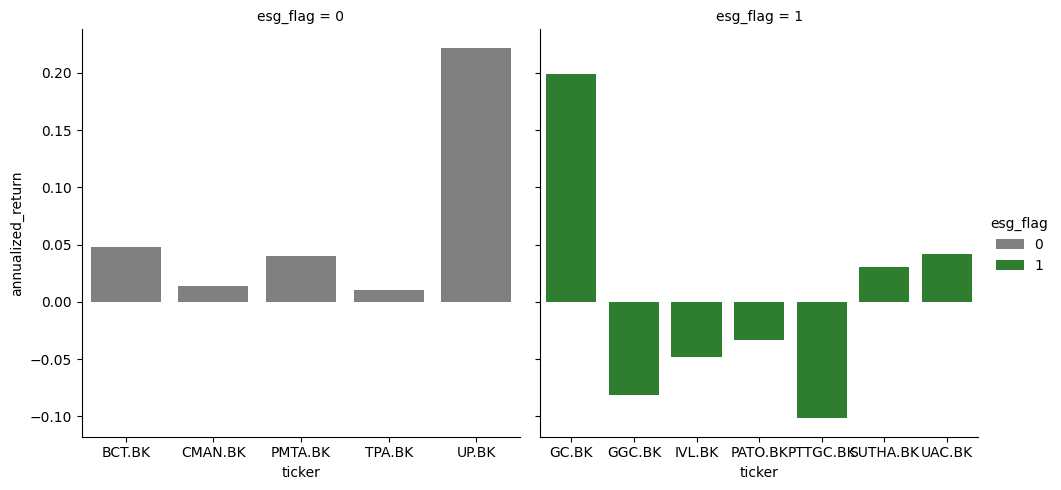

In [48]:
# Plot annualized returns by ESG flag
plt.figure(figsize=(12, 7))
sns.catplot(annualized_chart[annualized_chart["ticker"]!='^SET.BK'],
            x='ticker',
            y='annualized_return',
            col="esg_flag",
            sharex=False,
            kind="bar",
            hue='esg_flag',
            palette=["grey","forestgreen"]);

### **Quantifying Risk: Calculating Annualized Volatility**


Quantifies the level of risk associated with each stock. While annualized return tells us about the potential reward, volatility tells us about the price uncertainty and fluctuation an investor would have experienced.

**Financial Metric: Annualized Volatility (Standard Deviation of Returns)**

*   **Definition**: Annualized volatility is the annualized standard deviation of an asset's returns. A higher volatility means the stock's price has fluctuated more dramatically over the period, indicating higher risk. A lower volatility signifies a more stable stock with smaller price swings.

*   **Formula**:
$$ \sigma_{\text{annual}} = \sigma_{\text{daily}} \times \sqrt{252} $$
    Where:
    *   $ \sigma_{\text{annual}} $ is the annualized volatility.
    *   $ \sigma_{\text{daily}} $ is the standard deviation of the daily returns.
    *   $252$ is the number of trading days in a year.


In [49]:
# Calculate annualized volatility
annualized_volatility = returns_df.std() * (252 ** 0.5)
annualized_volatility

,0
ticker,
BCT.BK,0.266117
CMAN.BK,0.384306
GC.BK,0.264896
GGC.BK,0.407282
IVL.BK,0.408503
PATO.BK,0.188090
PMTA.BK,0.354293
PTTGC.BK,0.380902
SUTHA.BK,0.416825


### **Merging Volatility Data with Company Information**

Combines our calculated `annualized_volatility` data with the main `companies_df` DataFrame. This creates a new, self-contained table (`volatility_chart`) that links each company's risk profile directly to its name and ESG status.

In [50]:
# To merge a Series with a DataFrame, the Series must have a name.
# Convert the Series to a DataFrame with a named column before merging.
volatility_chart = pd.merge(companies_df, annualized_volatility.to_frame(name='annualized_volatility'), on='ticker')
volatility_chart[volatility_chart["ticker"]!='^SET.BK']


,ticker,company_name,esg_flag,annualized_volatility
0,BCT.BK,BIRLA CARBON (THAILAND) PUBLIC COMPANY LIMITED,0,0.266117
1,CMAN.BK,CHEMEMAN PUBLIC COMPANY LIMITED,0,0.384306
2,GC.BK,GLOBAL CONNECTIONS PUBLIC COMPANY LIMITED,1,0.264896
3,GGC.BK,GLOBAL GREEN CHEMICALS PUBLIC COMPANY LIMITED,1,0.407282
4,IVL.BK,INDORAMA VENTURES PUBLIC COMPANY LIMITED,1,0.408503
5,PATO.BK,PATO CHEMICAL INDUSTRY PUBLIC COMPANY LIMITED,1,0.188090
6,PMTA.BK,PM THORESEN ASIA HOLDINGS PUBLIC COMPANY LIMITED,0,0.354293
7,PTTGC.BK,PTT GLOBAL CHEMICAL PUBLIC COMPANY LIMITED,1,0.380902
8,SUTHA.BK,GOLDEN LIME PUBLIC COMPANY LIMITED,1,0.416825
9,TPA.BK,THAI POLY ACRYLIC PUBLIC COMPANY LIMITED,0,0.428407


### **Visualizing Risk: Side-by-Side Volatility Comparison**

Uses Seaborn's `catplot` function to generate **separate, side-by-side bar charts**—one exclusively for the ESG group and one for the Non-ESG group. This provides an unambiguous, direct comparison of the risk levels within and between the two categories.

<Figure size 1200x700 with 0 Axes>

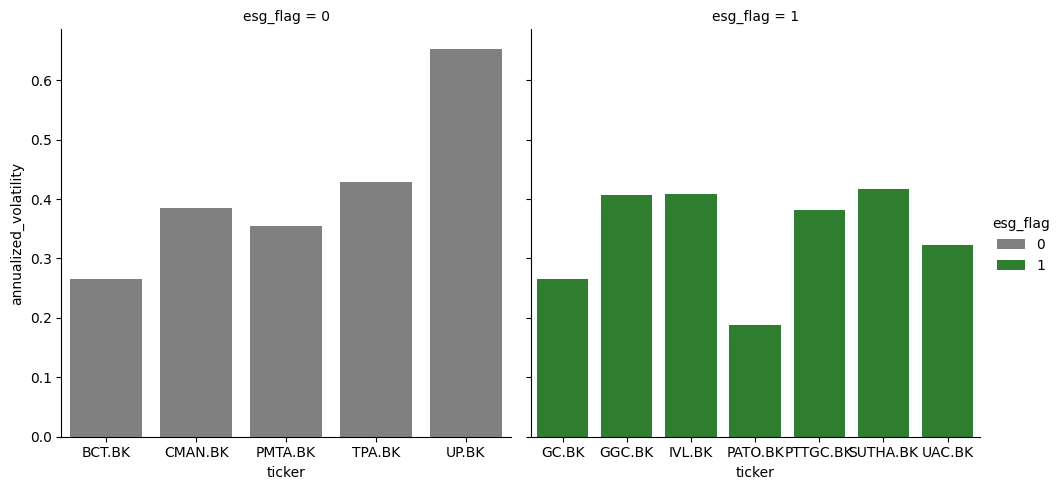

In [51]:
# Plot annualized volatility by ESG flag
plt.figure(figsize=(12, 7))
sns.catplot(volatility_chart[volatility_chart["ticker"]!='^SET.BK'],
          x="ticker",
          y="annualized_volatility",
          col="esg_flag",
          kind="bar",
          sharex=False,
          hue="esg_flag",
          palette=["grey","forestgreen"]
);


### **Calculating the Sharpe Ratio: Risk-Adjusted Return**

Synthesizes our previously calculated return and risk metrics into a single, powerful number that measures risk-adjusted performance. This allows us to determine which stocks provided the best return for the amount of risk taken.

**Financial Metric: Sharpe Ratio**

*   **Definition**: The Sharpe Ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. It tells an investor how much excess return they are receiving for each additional unit of risk they take on. In simple terms, it answers the question: "Am I being  compensated for the risk I'm taking?"

*   **Formula**:
$$ \text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p} $$
    Where:
    *   $ R_p $ is the annualized return of the asset.
    *   $ R_f $ is the risk-free rate (10-year Thai government bond).
    *   $ \sigma_p $ is the annualized volatility (standard deviation) of the asset's returns.


In [52]:
# Calculate Sharpe Ratio
sharpe_ratio = (annualized_returns - 0.0175) / annualized_volatility
sharpe_ratio

,0
ticker,
BCT.BK,0.113837
CMAN.BK,-0.009840
GC.BK,0.684025
GGC.BK,-0.242291
IVL.BK,-0.161648
PATO.BK,-0.272364
PMTA.BK,0.062970
PTTGC.BK,-0.312689
SUTHA.BK,0.030413


### **Merging Sharpe Ratio Data with Company Information**

Combines our calculated `sharpe_ratio` data with the main `companies_df` DataFrame. This creates a new, self-contained table (`sharpe_chart`) that links each company's investment returns directly to its name and ESG status.

In [53]:
# To merge a Series with a DataFrame, the Series must have a name.
# Convert the Series to a DataFrame with a named column before merging.
sharpe_chart = pd.merge(companies_df, sharpe_ratio.to_frame(name='sharpe ratio'), on='ticker')
sharpe_chart[sharpe_chart["ticker"]!="^SET.BK"]

,ticker,company_name,esg_flag,sharpe ratio
0,BCT.BK,BIRLA CARBON (THAILAND) PUBLIC COMPANY LIMITED,0,0.113837
1,CMAN.BK,CHEMEMAN PUBLIC COMPANY LIMITED,0,-0.009840
2,GC.BK,GLOBAL CONNECTIONS PUBLIC COMPANY LIMITED,1,0.684025
3,GGC.BK,GLOBAL GREEN CHEMICALS PUBLIC COMPANY LIMITED,1,-0.242291
4,IVL.BK,INDORAMA VENTURES PUBLIC COMPANY LIMITED,1,-0.161648
5,PATO.BK,PATO CHEMICAL INDUSTRY PUBLIC COMPANY LIMITED,1,-0.272364
6,PMTA.BK,PM THORESEN ASIA HOLDINGS PUBLIC COMPANY LIMITED,0,0.062970
7,PTTGC.BK,PTT GLOBAL CHEMICAL PUBLIC COMPANY LIMITED,1,-0.312689
8,SUTHA.BK,GOLDEN LIME PUBLIC COMPANY LIMITED,1,0.030413
9,TPA.BK,THAI POLY ACRYLIC PUBLIC COMPANY LIMITED,0,-0.017666


### **Visualizing Risk: Side-by-Side Sharpe Ratio Comparison**

Uses Seaborn's `catplot` function to generate **separate, side-by-side bar charts**—one exclusively for the ESG group and one for the Non-ESG group. This provides an unambiguous, direct comparison of the investment returns within and between the two categories.

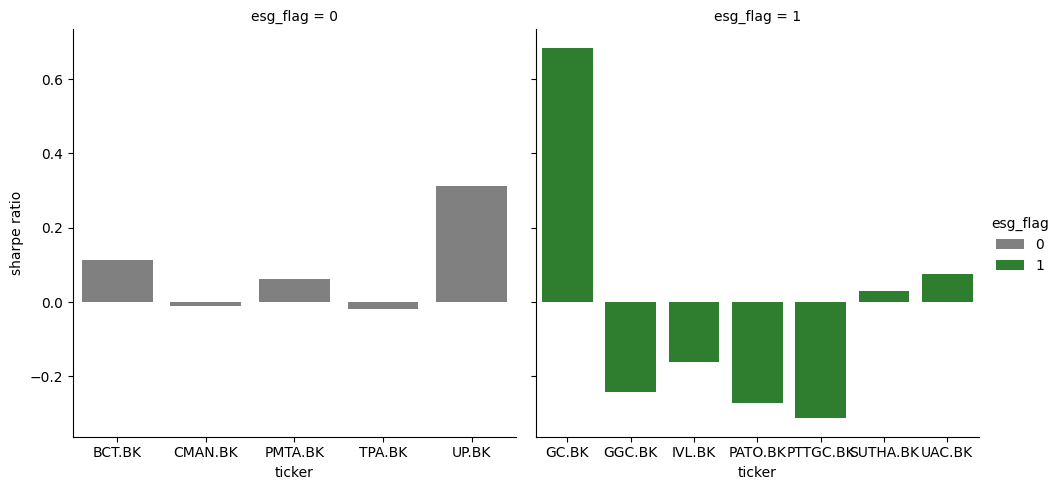

In [54]:
# Plot Sharpe Ratio by ESG flag
sns.catplot(sharpe_chart[sharpe_chart["ticker"]!="^SET.BK"],
            x="ticker",
            y="sharpe ratio",
            col="esg_flag",
            kind="bar",
            hue="esg_flag",
            sharex=False,
            palette=["grey","forestgreen"]
            );

### **Assembling the Master Metrics DataFrame**

Consolidates all the individual financial metrics we have calculated so far (Annualized Return, Volatility, and Sharpe Ratio) into a single, clean, and unified DataFrame called `metrics_df`. This master table will serve as the central source for all subsequent analysis and visualization.

In [55]:
# Combine all metrics into a single DataFrame
metrics_df = pd.DataFrame()
metrics_df["ticker"] = companies_df["ticker"]

# Align series by ticker labels using map so we don't get NaNs from integer index alignment
metrics_df["annualized_return"] = metrics_df["ticker"].map(annualized_returns)
metrics_df["annualized_volatility"] = metrics_df["ticker"].map(annualized_volatility)
metrics_df["sharpe_ratio"] = metrics_df["ticker"].map(sharpe_ratio)

metrics_df

,ticker,annualized_return,annualized_volatility,sharpe_ratio
0,BCT.BK,0.047794,0.266117,0.113837
1,CMAN.BK,0.013718,0.384306,-0.009840
2,GC.BK,0.198695,0.264896,0.684025
3,GGC.BK,-0.081181,0.407282,-0.242291
4,IVL.BK,-0.048534,0.408503,-0.161648
5,PATO.BK,-0.033729,0.188090,-0.272364
6,PMTA.BK,0.039810,0.354293,0.062970
7,PTTGC.BK,-0.101604,0.380902,-0.312689
8,SUTHA.BK,0.030177,0.416825,0.030413
9,TPA.BK,0.009932,0.428407,-0.017666


### **Data Acquisition: Fetching Fundamental Ratios**

Programmatically downloads key fundamental ratios for each company in our sample using the `yfinance` library. This data provides a deeper, accounting-based perspective on profitability, valuation, and leverage.

**Financial Metrics Fetched:**

**Price-to-Earnings (P/E) Ratio**

* **Definition:** It compares a company's current share price to its earnings per share (EPS). It shows how much investors are willing to pay for each dollar of a company's earnings.

* **Interpretation:** A high P/E ratio can suggest that investors expect high future growth, while a low P/E ratio might indicate an undervalued stock or a company with lower growth prospects.

* **Formula:**
$ \text{P/E Ratio} = \frac{\text{Market Value per Share}}{\text{Earnings per Share (EPS)}} $

**Return on Equity (ROE)**

* **Definition:** It measures how effectively a company's management is using the money invested by its shareholders to generate profits.

* **Interpretation:** A higher ROE indicates greater profitability and efficiency. It answers the question: "How much profit does the company generate for each dollar of shareholder equity?"

* **Formula:**
$ \text{ROE} = \frac{\text{Net Income}}{\text{Average Shareholder's Equity}} $

**Debt-to-Equity (D/E) Ratio**

* **Definition:** It compares a company's total liabilities to its total shareholder equity. It is used to evaluate how much a company is relying on debt to finance its assets.

* **Interpretation:** A high D/E ratio indicates higher leverage and potentially higher risk, as the company has significant debt obligations. A lower ratio suggests a more conservative, equity-financed structure.

* **Formula:**
$ \text{Debt-to-Equity} = \frac{\text{Total Liabilities}}{\text{Total Shareholder's Equity}} $

**Beta**

* **Definition:** Beta measures the volatility of a stock in relation to the overall market (in our case, the SET Index).

* **Interpretation:**
  * A Beta of 1 means the stock moves in line with the market.
  * A Beta > 1 means the stock is more volatile than the market.
  * A Beta < 1 means the stock is less volatile than the market.

* **Formula:**
$ \beta = \frac{\text{Cov}(R_p, R_m)}{\text{Var}(R_m)} $ (Covariance of asset and market returns / Variance of market returns)

### **Data Acquisition: Fetching Fundamental Ratios**

Programmatically downloads key **fundamental ratios** for each company in our sample using the `yfinance` library. This data provides a deeper, accounting-based perspective on profitability, valuation, and leverage.

In [56]:
# Fetch fundamental data for each company
fundamentals_list = []

for tick in companies_data["ticker"]:
    ticker = yf.Ticker(tick)
    fundamentals_list.append({
        "ticker": tick,
        "pe_ratio": ticker.info.get('trailingPE'),
        "roe": ticker.info.get('returnOnEquity'),
        "debt_to_equity": ticker.info.get('debtToEquity'),
        "beta": ticker.info.get('beta')
    })

fundamentals_df = pd.DataFrame(fundamentals_list)
fundamentals_df

,ticker,pe_ratio,roe,debt_to_equity,beta
0,BCT.BK,10.355648,0.09315,0.002,0.225
1,CMAN.BK,10.347826,0.14166,101.674,0.381
2,GC.BK,9.476191,0.33104,154.380,0.038
3,GGC.BK,NaN,-0.06750,4.147,0.275
4,IVL.BK,NaN,-0.00826,196.670,0.821
5,PATO.BK,11.639344,0.15458,0.066,NaN
6,PMTA.BK,5.555556,0.10424,39.039,0.300
7,PTTGC.BK,NaN,-0.07501,61.419,0.960
8,SUTHA.BK,16.533333,0.05078,81.583,0.381
9,TPA.BK,NaN,-0.06366,1.654,NaN


### **Creating the Final Master DataFrame**

Consolidatea all of our disparate datasets—company information, market-based performance metrics, and fundamental ratios—into a single, unified, and analysis-ready **master DataFrame**. This `full_metrics_df` will be the definitive source for all subsequent visualizations, statistical tests, and conclusions.

In [57]:
# Combine all data into a single DataFrame
full_metrics_df = pd.merge(companies_df, metrics_df, on='ticker')
full_metrics_df = pd.merge(full_metrics_df, fundamentals_df, on='ticker')
full_metrics_df['esg_status'] = full_metrics_df['esg_flag'].apply(lambda x: 'ESG' if x == 1 else 'Non-ESG')

In [58]:
# Display full metrics DataFrame excluding SET index
full_metrics_df[full_metrics_df["ticker"]!="^SET.BK"]

,ticker,company_name,esg_flag,annualized_return,annualized_volatility,sharpe_ratio,pe_ratio,roe,debt_to_equity,beta,esg_status
0,BCT.BK,BIRLA CARBON (THAILAND) PUBLIC COMPANY LIMITED,0,0.047794,0.266117,0.113837,10.355648,0.09315,0.002,0.225,Non-ESG
1,CMAN.BK,CHEMEMAN PUBLIC COMPANY LIMITED,0,0.013718,0.384306,-0.009840,10.347826,0.14166,101.674,0.381,Non-ESG
2,GC.BK,GLOBAL CONNECTIONS PUBLIC COMPANY LIMITED,1,0.198695,0.264896,0.684025,9.476191,0.33104,154.380,0.038,ESG
3,GGC.BK,GLOBAL GREEN CHEMICALS PUBLIC COMPANY LIMITED,1,-0.081181,0.407282,-0.242291,NaN,-0.06750,4.147,0.275,ESG
4,IVL.BK,INDORAMA VENTURES PUBLIC COMPANY LIMITED,1,-0.048534,0.408503,-0.161648,NaN,-0.00826,196.670,0.821,ESG
5,PATO.BK,PATO CHEMICAL INDUSTRY PUBLIC COMPANY LIMITED,1,-0.033729,0.188090,-0.272364,11.639344,0.15458,0.066,NaN,ESG
6,PMTA.BK,PM THORESEN ASIA HOLDINGS PUBLIC COMPANY LIMITED,0,0.039810,0.354293,0.062970,5.555556,0.10424,39.039,0.300,Non-ESG
7,PTTGC.BK,PTT GLOBAL CHEMICAL PUBLIC COMPANY LIMITED,1,-0.101604,0.380902,-0.312689,NaN,-0.07501,61.419,0.960,ESG
8,SUTHA.BK,GOLDEN LIME PUBLIC COMPANY LIMITED,1,0.030177,0.416825,0.030413,16.533333,0.05078,81.583,0.381,ESG
9,TPA.BK,THAI POLY ACRYLIC PUBLIC COMPANY LIMITED,0,0.009932,0.428407,-0.017666,NaN,-0.06366,1.654,NaN,Non-ESG


## **Exploratory Data Analysis (EDA)**

### **Visualizing Risk-Adjusted Performance: Sharpe Ratio Distribution**

Generates a **box plot** that compares the distribution of the **Sharpe Ratio** for the ESG group against the Non-ESG group. This chart provides a rich, visual summary of risk-adjusted performance, going beyond simple averages to show the range, median, and spread of the data for both categories.

/tmp/ipython-input-325342010.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




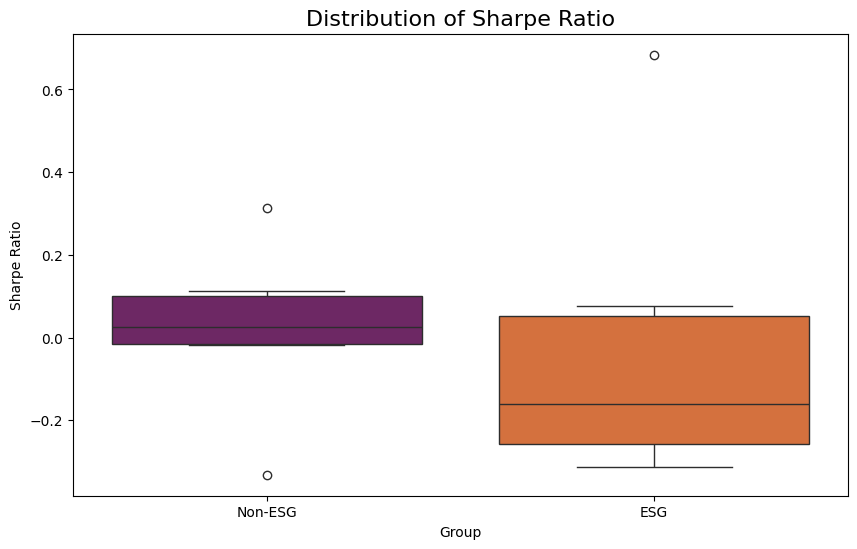

In [59]:
# Plot Sharpe Ratio distribution by ESG status
plt.figure(figsize= (10, 6))
sns.boxplot(data= full_metrics_df, x= 'esg_status', y= 'sharpe_ratio', palette= 'inferno')
plt.title('Distribution of Sharpe Ratio', fontsize= 16)
plt.ylabel('Sharpe Ratio')
plt.xlabel('Group')
plt.show()

### **Visualizing Profitability: Return on Equity (ROE) Distribution**

Generates a **box plot** to visually compare the **Return on Equity (ROE)** between the ESG and Non-ESG groups to analyze the fundamental profitability of the companies in our sample. This shifts the focus from market-based performance to how effectively each company's management is generating profits from shareholder investments.

/tmp/ipython-input-368122552.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




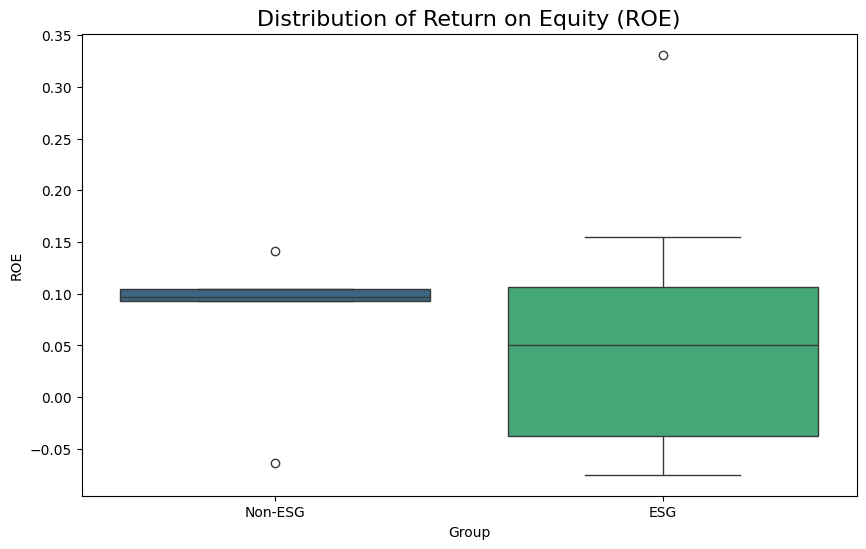

In [60]:
# Plot Annualized Return distribution by ESG status
plt.figure(figsize= (10, 6))
sns.boxplot(data= full_metrics_df, x= 'esg_status', y= 'roe', palette= 'viridis')
plt.title('Distribution of Return on Equity (ROE)', fontsize= 16)
plt.ylabel('ROE')
plt.xlabel('Group')
plt.show()

### **Visualizing Market Risk: Beta Distribution**

Generates a **box plot** to visually compare the **Beta** of the ESG group versus the Non-ESG group to analyze the systematic risk of the companies in our sample—that is, how sensitive their stock prices are to the movements of the overall market (the SET Index).

/tmp/ipython-input-2656983215.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




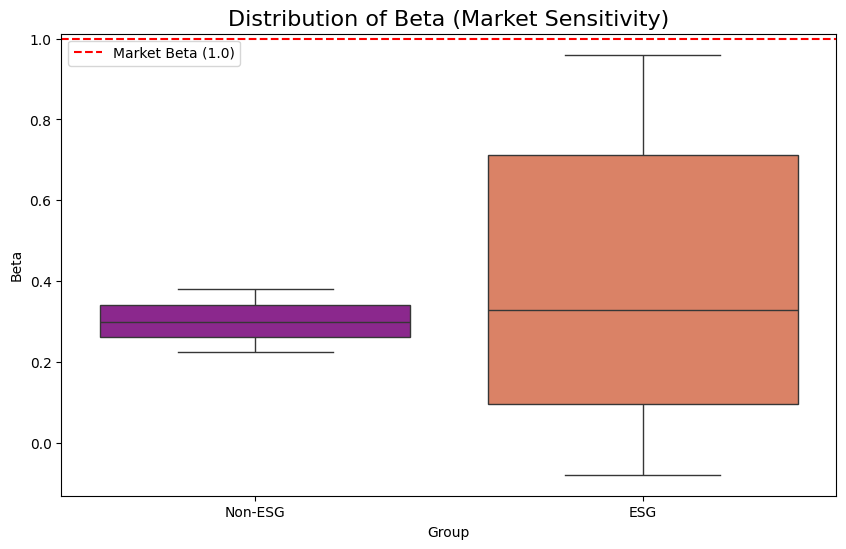

In [61]:
# Plot Beta distribution by ESG status
plt.figure(figsize= (10, 6))
sns.boxplot(data= full_metrics_df, x= 'esg_status', y= 'beta', palette= 'plasma')
plt.title('Distribution of Beta (Market Sensitivity)', fontsize= 16)
plt.ylabel('Beta')
plt.xlabel('Group')
plt.axhline(y=1.0, color='red', linestyle='--', label='Market Beta (1.0)')
plt.legend()
plt.show()

## **Statistical Analysis (Mann–Whitney U test)**

### **Preparing Data for Statistical Testing**

Splits our master `full_metrics_df` DataFrame into two separate, smaller DataFrames: one containing only the ESG companies and another containing only the Non-ESG companies. This separation is a prerequisite for performing a two-sample statistical test, which is designed to compare two independent groups.

In [62]:
# Separate ESG and Non-ESG groups
esg_group = full_metrics_df[full_metrics_df['esg_status'] == 'ESG']
non_esg_group = full_metrics_df[full_metrics_df['esg_status'] == 'Non-ESG']

### **Statistical Test: Comparing Sharpe Ratios**

Quantitatively determines if the observed difference in **Sharpe Ratios** between the ESG and Non-ESG groups is **statistically significant**. This test provides the analytical rigor needed to make a confident conclusion.

In [63]:
# Mann-Whitney U test: Sharpe Ratio
# statistic, p_value = stats.mannwhitneyu(x=group1, y=group2)
u_stat_sharpe, p_val_sharpe = stats.mannwhitneyu(esg_group['sharpe_ratio'].dropna(), non_esg_group['sharpe_ratio'].dropna())

print("--- Statistical Test Results ---")
print(f"Sharpe Ratio Comparison:")
print(f"P-value: {p_val_sharpe:.4f}")
if p_val_sharpe < 0.05:
    print("Conclusion: The difference in Sharpe Ratios is statistically significant.\n")
else:
    print("Conclusion: The difference in Sharpe Ratios is NOT statistically significant.\n")

--- Statistical Test Results ---
Sharpe Ratio Comparison:
P-value: 0.6282
Conclusion: The difference in Sharpe Ratios is NOT statistically significant.



### **Statistical Test: Comparing Profitability (ROE)**

Quantitatively determines if the observed difference in **Return on Equity (ROE)** between the ESG and Non-ESG groups is **statistically significant**. This test moves our analysis from market performance to the underlying fundamental profitability of the companies.

In [64]:
# Mann-Whitney U test: ROE
# statistic, p_value = stats.mannwhitneyu(x=group1, y=group2)
u_stat_roe, p_val_roe = stats.mannwhitneyu(esg_group['roe'].dropna(), non_esg_group['roe'].dropna())

print(f"Return on Equity (ROE) Comparison:")
print(f"P-value: {p_val_roe:.4f}")
if p_val_roe < 0.05:
    print("Conclusion: The difference in ROE is statistically significant.")
else:
    print("Conclusion: The difference in ROE is NOT statistically significant.")

Return on Equity (ROE) Comparison:
P-value: 0.5303
Conclusion: The difference in ROE is NOT statistically significant.


## **Interactive Visualization**

### **Interactive Visualization: Cumulative Growth Over Time**

Generates a fully **interactive line chart** that shows the cumulative growth of an investment in each stock over the entire analysis period. This chart is a key deliverable for the final presentation, allowing for dynamic exploration of the performance data.

In [66]:
# Calculate cumulative returns for plotting
cumulative_returns_df = (1 + returns_df).cumprod()

# Prepare data for Plotly (long format)
plot_data = cumulative_returns_df.reset_index().melt(id_vars='Date', var_name='ticker', value_name='Cumulative Growth')

# Add ESG status to the plot data
plot_data = pd.merge(plot_data, full_metrics_df[['ticker', 'esg_status']], on='ticker', how='left')

# For the SET index, fill NaN with 'Benchmark'
plot_data['esg_status'].fillna('Benchmark', inplace=True)

# Create the interactive line chart
fig = px.line(
    plot_data,
    x='Date',
    y='Cumulative Growth',
    color='ticker',
    line_dash='esg_status',
    title="<b>Interactive Chart: Growth of 1 Baht Invested</b>",
    labels={'Cumulative Growth': 'Value of 1 Baht', 'Date': 'Date'},
    hover_name='ticker'
)

fig.update_layout(
    legend_title_text='Ticker / Status',
    font=dict(family="Arial, sans-serif", size=12)
)

# Show the interactive plot
fig.show()

/tmp/ipython-input-2895579105.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## **Conclusion**

### **Question 1**:
Do ESG-compliant firms in the Petrochemicals & Chemicals sector provide higher risk-adjusted returns (Sharpe Ratio) than their peers?



#### **Answer:**
No, the ESG-complaint firms in the sector do not provide higher risk-adjusted returns than Non-ESG frims.

   Based on the Sharpe ratio calculation, firms with ESG policies shows a significantly negative Sharpe ratio, indicating that investors face higher risks relative to their returns. In contrast, non-ESG companies demonstrate stronger Sharpe ratios, suggesting better risk-adjusted performance over the seven-year period examined.

   However, when considering volatility, ESG firms show a lower average level of volatility compared with non-ESG firms. This suggests that, in the long term, ESG investments may offer more stable and reliable outcomes despite their weaker short-term risk-adjusted returns.



#### **Assumption:**
The deeply negative Sharpe ratio of firms with ESG may be influenced by the cyclical downswing during the seven-year period analyzed. This market downturn could have temporarily decreased returns, causing the Sharpe ratio to appear lower than it should be (under more stable economic conditions)

### **Question 2**:
Do ESG firms exhibit stronger fundamentals, such as higher profitability (ROE) or lower leverage (Debt-to-Equity)?

#### **Answer:**
No, ESG firms do not show stronger fundamentals.

The bar chart shows that ROE values of firms with ESG policies tend to exhibit higher variability, while Non-ESG firms showed stable positive ROE, many in ESG group.

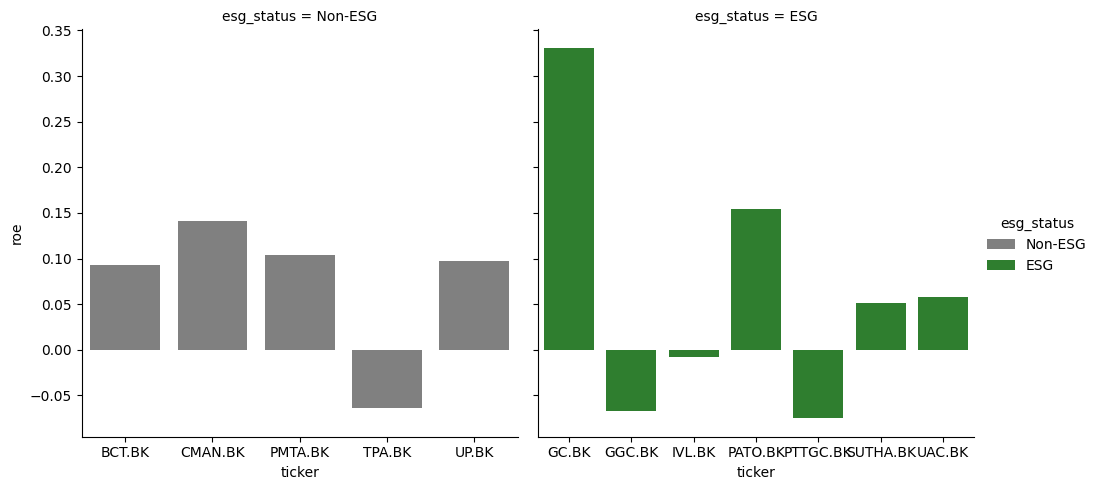

In [67]:
# Plot ROE by ESG status
sns.catplot(full_metrics_df,
            x="ticker",
            y="roe",
            col="esg_status",
            sharex=False,
            kind="bar",
            hue="esg_status",
            palette=["grey","forestgreen"]
            );

#### **Assumption:**
ESG companies tend to show more volatile ROE because they face higher upfront sustainability investments, transition costs, and stricter compliance requirements, which can cause fluctuations in short-term profitability. In contrast, Non-ESG firms often exhibit more stable ROE because they have fewer sustainability-related expenses, simpler cost structures, and lower regulatory burden, leading to more predictable earnings.

### **Question 3:**
How do the valuation multiples (P/E Ratio) of ESG firms compare to non-ESG firms in the same sector?

#### **Answer:**




###**Prepare the `full_metrics_df` for P/E ratio analysis**
Create a new DataFrame `pe_analysis_df` that excludes the SET benchmark and drops rows with missing P/E ratio values.


In [68]:
# Prepare PE ratio data excluding SET index and dropping NaNs
pe_analysis_df = full_metrics_df[full_metrics_df['ticker'] != '^SET.BK'].copy()
pe_analysis_df.dropna(subset=['pe_ratio'], inplace=True)

display(pe_analysis_df.head())

,ticker,company_name,esg_flag,annualized_return,annualized_volatility,sharpe_ratio,pe_ratio,roe,debt_to_equity,beta,esg_status
0,BCT.BK,BIRLA CARBON (THAILAND) PUBLIC COMPANY LIMITED,0,0.047794,0.266117,0.113837,10.355648,0.09315,0.002,0.225,Non-ESG
1,CMAN.BK,CHEMEMAN PUBLIC COMPANY LIMITED,0,0.013718,0.384306,-0.009840,10.347826,0.14166,101.674,0.381,Non-ESG
2,GC.BK,GLOBAL CONNECTIONS PUBLIC COMPANY LIMITED,1,0.198695,0.264896,0.684025,9.476191,0.33104,154.380,0.038,ESG
5,PATO.BK,PATO CHEMICAL INDUSTRY PUBLIC COMPANY LIMITED,1,-0.033729,0.188090,-0.272364,11.639344,0.15458,0.066,NaN,ESG
6,PMTA.BK,PM THORESEN ASIA HOLDINGS PUBLIC COMPANY LIMITED,0,0.039810,0.354293,0.062970,5.555556,0.10424,39.039,0.300,Non-ESG


### **Visualizing Valuation: Price-to-Earnings (P/E) Ratio Distribution**

Generate a **box plot** to visually compare the **Price-to-Earnings (P/E) Ratio** between the ESG and Non-ESG groups. This visualization helps in understanding how the market values these two types of companies relative to their earnings.

/tmp/ipython-input-3889740440.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




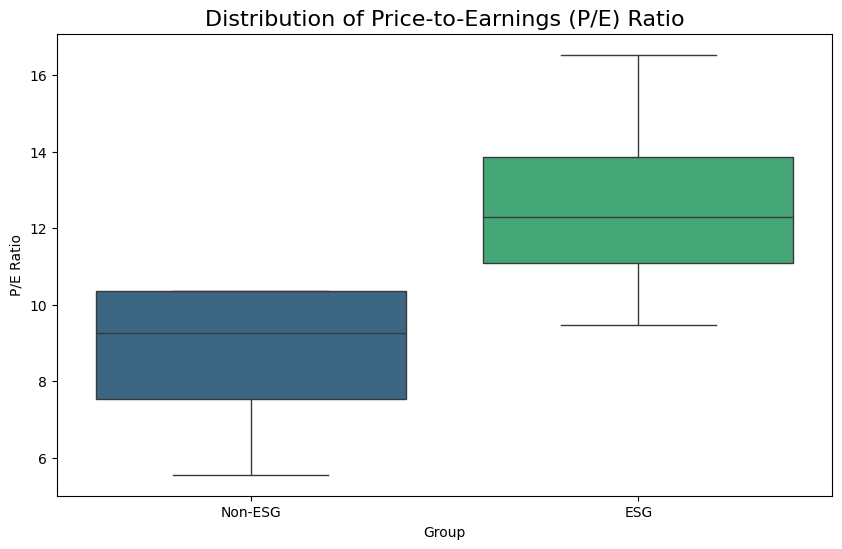

In [69]:
# Plot PE ratio distribution by ESG status
plt.figure(figsize=(10, 6))
sns.boxplot(data=pe_analysis_df, x='esg_status', y='pe_ratio', palette='viridis')
plt.title('Distribution of Price-to-Earnings (P/E) Ratio', fontsize=16)
plt.ylabel('P/E Ratio')
plt.xlabel('Group')
plt.show()

### **Statistical Test: Comparing Valuation (P/E Ratio)**

Perform a **Mann-Whitney U** test to quantitatively determine if the observed difference in **P/E ratios between the ESG and Non-ESG groups** is statistically significant. Print the **P-value** and a conclusion based on a 0.05 significance level.

In [70]:
# Import scipy stats
from scipy import stats

# Separate ESG and Non-ESG P/E ratios
esg_pe = pe_analysis_df[pe_analysis_df['esg_status'] == 'ESG']['pe_ratio']
non_esg_pe = pe_analysis_df[pe_analysis_df['esg_status'] == 'Non-ESG']['pe_ratio']

# Mann-Whitney U test: P/E Ratio
# statistic, p_value = stats.mannwhitneyu(x=group1, y=group2)
u_stat_pe, p_val_pe = stats.mannwhitneyu(esg_pe.dropna(), non_esg_pe.dropna())

print(f"--- Statistical Test Results ---")
print(f"P/E Ratio Comparison:")
print(f"P-value: {p_val_pe:.4f}")
if p_val_pe < 0.05:
    print("Conclusion: The difference in P/E Ratios is statistically significant.\n")
else:
    print("Conclusion: The difference in P/E Ratios is NOT statistically significant.\n")

--- Statistical Test Results ---
P/E Ratio Comparison:
P-value: 0.1143
Conclusion: The difference in P/E Ratios is NOT statistically significant.



### **Recommendations**

Based on our analysis of the Petrochemicals & Chemicals sector in Thailand, we can offer the following recommendations for investors:

*   **Individual Stock Selection Remains Crucial:** Given the lack of statistically significant differences between ESG and Non-ESG groups across key financial metrics, investors should prioritize thorough individual company analysis. ESG status alone does not guarantee superior financial performance in the Thai Petrochemicals & Chemicals sector.
*   **Long-Term Perspective for ESG:** The benefits of ESG investments, such as enhanced brand reputation, operational efficiency from sustainable practices, and reduced regulatory risks, may materialize over longer time horizons than captured in this 7-year analysis. Investors with a long-term vision might still integrate ESG factors into their decision-making for reasons beyond immediate financial outperformance.
*   **Market Inefficiency or Early Stage Adoption:** The findings might suggest either a market inefficiency where ESG benefits are not yet fully priced in, or that the adoption and impact of ESG practices in this specific Thai sector are still in early stages and have not consistently translated into superior financial metrics yet.

### **Limitations and Future Work**

* **Timeframe Sensitivity:**

  * Some firms, such as CMAN, were recently listed, leading to a limited range of historical data compared with companies that have been in the market for many years. However, to ensure the consistency, our team set the opening date as 2018-03-21, aligning with the registration of new firms. This provides comparability, but could not be generalized to prove that "ESG" firms always underperform.

    **Future Work:**
  
  * With a longer dataset in the future, we would like to extend the timeframe to leverage the reliability of the analysis.
* **Data Limitation**
  * The data in this project relies on yfinance, which has incomplete data for international stocks. This lead to difficulties when calculating beta and debt_to_equity.

    **Future Work:**
  * Integrate a Formal ESG Data Source. The project should be improved by pulling data from a premium official source, such as Bloomberg, SETtrade Official API.